TEST DISTANCE WASSERSTEIN

In [9]:
# Initialisation des librairies

import numpy as np
import matplotlib.pyplot as pl
import ot
import ot.plot
import pandas as pd

Illustration des gaussiennes

In [32]:
# Génération des distributions
N = 1000

def mean(t):
    return [t,t]

cov = [[1, 0], [0, 1]] 

# Génération de l'échantillon limite
def Z(t):
    return np.random.multivariate_normal(mean(t), cov, N)

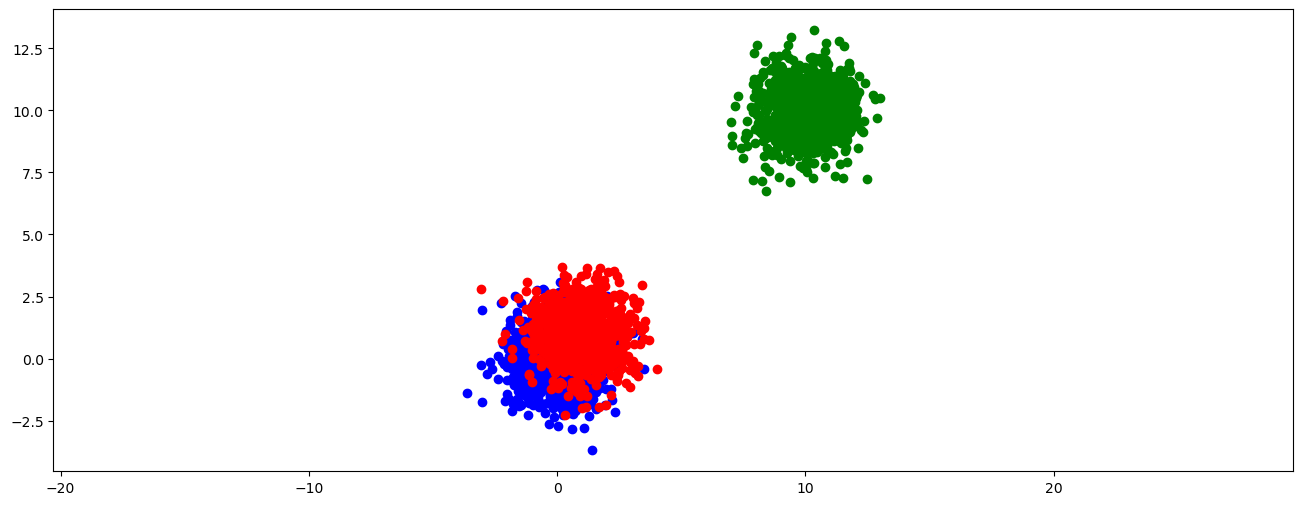

In [33]:
# Tracé des distributions

Z0 = Z(0)
Z1 = Z(1)
Z10 = Z(10)

pl.figure( figsize =(16 ,6) )
pl.scatter(Z0[: ,0] , Z0[: ,1] , color = "b")
pl.scatter(Z1[: ,0] , Z1[: ,1] , color = "r")
pl.scatter(Z10[: ,0] , Z10[: ,1] , color = "g")
pl.axis('equal')
pl.show()

Etude de l'évolution de la distance wasserstein entre Z(t) et Z0 en fonction de t

In [49]:
# Fonction distance de Wasserstein

def dist(source, cible):
    ''' source et cible sont des distributions  de même cardinal N'''
    a , b = np.ones(N) , np.ones(N)
    M = ot.dist(source , cible)
    return np.sqrt(ot.emd2(a , b , M))

In [51]:
# Génération des distributions en fonction de t

t_values = np.linspace(0, 10, 100)  # 100 points entre 0 et 10

Z0 = Z(0)
Z_values = [Z(t) for t in t_values]

dist_values = np.array([dist(Z0,Zt) for Zt in Z_values])

print(t_values)
print(dist_values)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

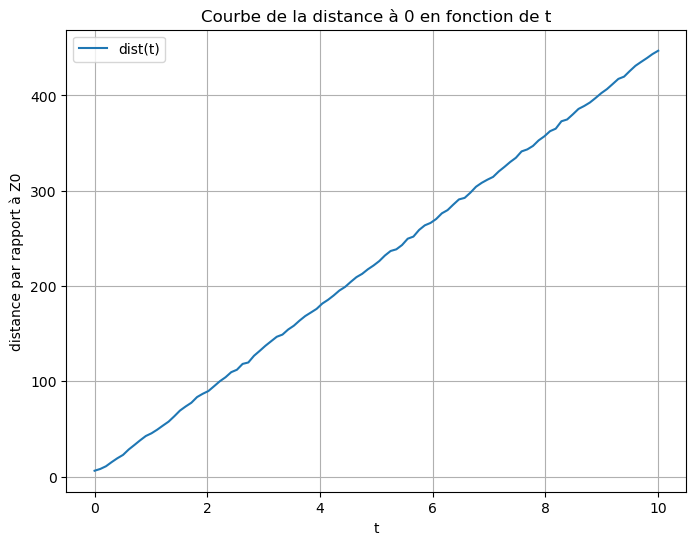

In [52]:
# Tracé de la courbe
plt.figure(figsize=(8, 6))
plt.plot(t_values, dist_values, label='dist(t)')
plt.title('Courbe de la distance à 0 en fonction de t')
plt.xlabel('t')
plt.ylabel('distance par rapport à Z0')
plt.legend()
plt.grid(True)
plt.show()